### 1. 두 가지의 symmetric normalization을 실습

In [16]:
# symmetric version (default)
!python gcn.py

use normalization: True
Epoch: 001, Loss: 1.9462, Train: 0.3571, Val: 0.2700, Test: 0.2530
Epoch: 002, Loss: 1.9428, Train: 0.5143, Val: 0.4460, Test: 0.4120
Epoch: 003, Loss: 1.9390, Train: 0.5714, Val: 0.6060, Test: 0.6040
Epoch: 004, Loss: 1.9367, Train: 0.6214, Val: 0.6300, Test: 0.6280
Epoch: 005, Loss: 1.9328, Train: 0.7429, Val: 0.6520, Test: 0.6770
Epoch: 006, Loss: 1.9255, Train: 0.7643, Val: 0.6540, Test: 0.6580
Epoch: 007, Loss: 1.9217, Train: 0.8071, Val: 0.6680, Test: 0.6520
Epoch: 008, Loss: 1.9168, Train: 0.8143, Val: 0.6860, Test: 0.6850
Epoch: 009, Loss: 1.9099, Train: 0.8286, Val: 0.7200, Test: 0.7310
Epoch: 010, Loss: 1.8997, Train: 0.8286, Val: 0.7380, Test: 0.7440
Epoch: 011, Loss: 1.8951, Train: 0.8429, Val: 0.7280, Test: 0.7440
Epoch: 012, Loss: 1.8859, Train: 0.8429, Val: 0.7280, Test: 0.7440
Epoch: 013, Loss: 1.8787, Train: 0.8643, Val: 0.7340, Test: 0.7440
Epoch: 014, Loss: 1.8684, Train: 0.8714, Val: 0.7360, Test: 0.7440
Epoch: 015, Loss: 1.8606, Train: 0.900

In [ ]:
# RW version(symmetric하지 않지만, 다른 symmetric한 normalization을 찾을 수 없었음, 또는 improved 옵션을 사용한 결과 원래의 결과와 같았음)
!python gcn.py --problem 1

use normalization: True
Epoch: 001, Loss: 1.9462, Train: 0.3571, Val: 0.2700, Test: 0.2530
Epoch: 002, Loss: 1.9428, Train: 0.5143, Val: 0.4460, Test: 0.4120
Epoch: 003, Loss: 1.9390, Train: 0.5714, Val: 0.6060, Test: 0.6040
Epoch: 004, Loss: 1.9367, Train: 0.6214, Val: 0.6300, Test: 0.6280
Epoch: 005, Loss: 1.9328, Train: 0.7429, Val: 0.6520, Test: 0.6770
Epoch: 006, Loss: 1.9255, Train: 0.7643, Val: 0.6540, Test: 0.6580
Epoch: 007, Loss: 1.9217, Train: 0.8071, Val: 0.6680, Test: 0.6520
Epoch: 008, Loss: 1.9168, Train: 0.8143, Val: 0.6860, Test: 0.6850
Epoch: 009, Loss: 1.9099, Train: 0.8286, Val: 0.7200, Test: 0.7310
Epoch: 010, Loss: 1.8997, Train: 0.8286, Val: 0.7380, Test: 0.7440
Epoch: 011, Loss: 1.8951, Train: 0.8429, Val: 0.7280, Test: 0.7440
Epoch: 012, Loss: 1.8859, Train: 0.8429, Val: 0.7280, Test: 0.7440
Epoch: 013, Loss: 1.8787, Train: 0.8643, Val: 0.7340, Test: 0.7440
Epoch: 014, Loss: 1.8684, Train: 0.8714, Val: 0.7360, Test: 0.7440
Epoch: 015, Loss: 1.8606, Train: 0.900

### 2. normalization의 유무에 따른 embedding norm분포 비교

use normalization: False


c:\Users\choi\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
c:\Users\choi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\choi\Graph-machine-learning\gcn.py:208: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  labels = dataset.data.y.detach().numpy()


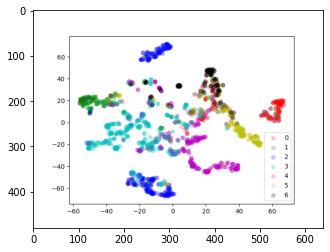

In [30]:
!python gcn.py --problem 2 --no-log
import matplotlib.pyplot as plt
import matplotlib.image as img

img_test = img.imread('gcn_without_normalization_result.png')
plt.imshow(img_test)

use normalization: True


c:\Users\choi\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
c:\Users\choi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\choi\Graph-machine-learning\gcn.py:208: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  labels = dataset.data.y.detach().numpy()


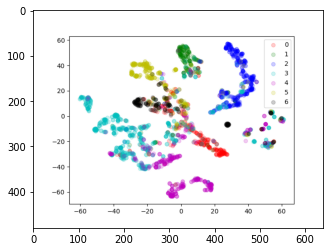

In [ ]:
!python gcn.py --show_image --no-log

img_test = img.imread('gcn_original_result.png')
plt.imshow(img_test)

### 3. normalization이 없을 때의 성능확인

In [ ]:
!python gcn.py --problem 3 
# 이상하게 결과 원래랑 같음 

use normalization: False
Epoch: 001, Loss: 1.9462, Train: 0.3571, Val: 0.2700, Test: 0.2530
Epoch: 002, Loss: 1.9428, Train: 0.5143, Val: 0.4460, Test: 0.4120
Epoch: 003, Loss: 1.9390, Train: 0.5714, Val: 0.6060, Test: 0.6040
Epoch: 004, Loss: 1.9367, Train: 0.6214, Val: 0.6300, Test: 0.6280
Epoch: 005, Loss: 1.9328, Train: 0.7429, Val: 0.6520, Test: 0.6770
Epoch: 006, Loss: 1.9255, Train: 0.7643, Val: 0.6540, Test: 0.6580
Epoch: 007, Loss: 1.9217, Train: 0.8071, Val: 0.6680, Test: 0.6520
Epoch: 008, Loss: 1.9168, Train: 0.8143, Val: 0.6860, Test: 0.6850
Epoch: 009, Loss: 1.9099, Train: 0.8286, Val: 0.7200, Test: 0.7310
Epoch: 010, Loss: 1.8997, Train: 0.8286, Val: 0.7380, Test: 0.7440
Epoch: 011, Loss: 1.8951, Train: 0.8429, Val: 0.7280, Test: 0.7440
Epoch: 012, Loss: 1.8859, Train: 0.8429, Val: 0.7280, Test: 0.7440
Epoch: 013, Loss: 1.8787, Train: 0.8643, Val: 0.7340, Test: 0.7440
Epoch: 014, Loss: 1.8684, Train: 0.8714, Val: 0.7360, Test: 0.7440
Epoch: 015, Loss: 1.8606, Train: 0.90

### 4. Cora 데이터의 각 label별로 training data, val, test data의 수를 학인

In [ ]:
!python gcn.py --problem 4

training data: 140
val data: 500
test data: 1000


### 5. training data의 edge list가 undirected인지 확인

In [22]:
!python gcn.py --problem 5

is undirected: True


### 6. hyperparameter를 변경해 가며, 최고의 성능을 찾기 - 경쟁

In [58]:
!python gcn.py --problem 6 --log

use normalization: True
Epoch: 001, Loss: 1.9464, Train: 0.2000, Val: 0.1100, Test: 0.1100
Epoch: 002, Loss: 1.9426, Train: 0.4571, Val: 0.2840, Test: 0.2820
Epoch: 003, Loss: 1.9379, Train: 0.6643, Val: 0.5520, Test: 0.5740
Epoch: 004, Loss: 1.9353, Train: 0.6714, Val: 0.6060, Test: 0.6370
Epoch: 005, Loss: 1.9297, Train: 0.6929, Val: 0.6680, Test: 0.6700
Epoch: 006, Loss: 1.9257, Train: 0.7429, Val: 0.6500, Test: 0.6700
Epoch: 007, Loss: 1.9214, Train: 0.7857, Val: 0.5660, Test: 0.6700
Epoch: 008, Loss: 1.9159, Train: 0.7929, Val: 0.5620, Test: 0.6700
Epoch: 009, Loss: 1.9090, Train: 0.7571, Val: 0.5460, Test: 0.6700
Epoch: 010, Loss: 1.9027, Train: 0.7786, Val: 0.5780, Test: 0.6700
Epoch: 011, Loss: 1.8936, Train: 0.7857, Val: 0.6120, Test: 0.6700
Epoch: 012, Loss: 1.8876, Train: 0.7929, Val: 0.6540, Test: 0.6700
Epoch: 013, Loss: 1.8804, Train: 0.8357, Val: 0.6940, Test: 0.6960
Epoch: 014, Loss: 1.8746, Train: 0.8571, Val: 0.7220, Test: 0.7220
Epoch: 015, Loss: 1.8664, Train: 0.871

### 7. layer 하나를 더 쌓아 성능을 올리기 - 경쟁

In [68]:
!python gcn.py --problem 7 --lr 0.01 --hidden_channels 32 --log

use normalization: True
Epoch: 001, Loss: 1.9454, Train: 0.1429, Val: 0.1580, Test: 0.1440
Epoch: 002, Loss: 1.9435, Train: 0.1429, Val: 0.1560, Test: 0.1440
Epoch: 003, Loss: 1.9391, Train: 0.1429, Val: 0.1560, Test: 0.1440
Epoch: 004, Loss: 1.9353, Train: 0.1643, Val: 0.1760, Test: 0.1670
Epoch: 005, Loss: 1.9247, Train: 0.3500, Val: 0.3900, Test: 0.3670
Epoch: 006, Loss: 1.9217, Train: 0.4071, Val: 0.3980, Test: 0.3680
Epoch: 007, Loss: 1.9120, Train: 0.2714, Val: 0.2680, Test: 0.3680
Epoch: 008, Loss: 1.9010, Train: 0.2571, Val: 0.2240, Test: 0.3680
Epoch: 009, Loss: 1.8932, Train: 0.3357, Val: 0.3040, Test: 0.3680
Epoch: 010, Loss: 1.8813, Train: 0.4143, Val: 0.3620, Test: 0.3680
Epoch: 011, Loss: 1.8773, Train: 0.4429, Val: 0.4360, Test: 0.4070
Epoch: 012, Loss: 1.8539, Train: 0.4643, Val: 0.5320, Test: 0.5050
Epoch: 013, Loss: 1.8420, Train: 0.4714, Val: 0.5960, Test: 0.5590
Epoch: 014, Loss: 1.8427, Train: 0.4786, Val: 0.5900, Test: 0.5590
Epoch: 015, Loss: 1.8180, Train: 0.478

### C. PubMed에서 최고의 성적을 내기